In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# Cargamos los datos
T = np.loadtxt('muestra.txt')
N = T.shape[0]

# Verosimilitud

In [ ]:
# Definimos el modelo estadistico
def p(z,theta):
  return 0.5*(1+theta*z)

In [ ]:
# Funcion de verosimilitud
def L(theta):
  return np.prod(0.5*(1+theta*T))

In [ ]:
# -LN de la Funcion de verosimilitud
def NLL(theta):
  return -np.sum(np.log((0.5*(1+theta*T))))

In [ ]:
# -LN de la Funcion de verosimilitud en un dato
def NLL_i(z, theta):
  return -np.log((0.5*(1+theta*z)))

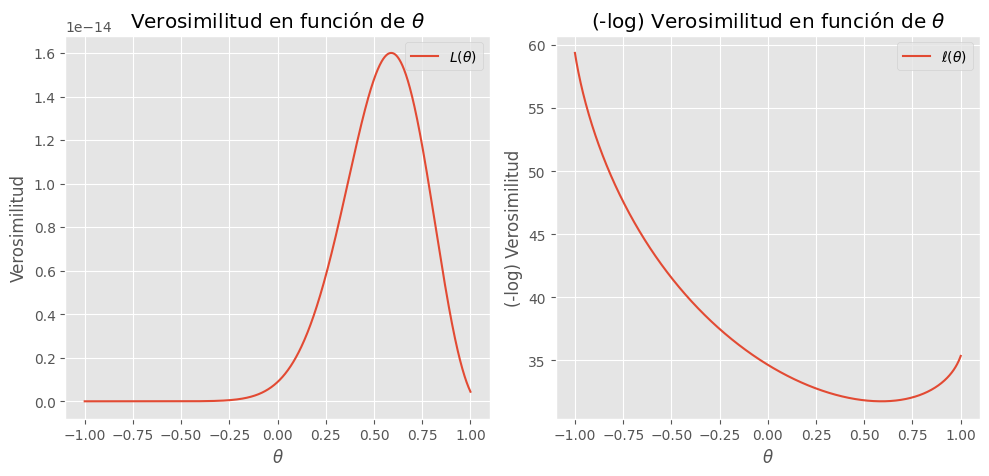

In [ ]:
# Graficos

theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

L_range = []
for i in range(len(theta_range)):
  L_range.append(L(theta_range[i]))

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(theta_range, L_range, label=r'$L(\theta)$')
axes[0].set_title(r'Verosimilitud en función de $\theta$')
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel('Verosimilitud')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

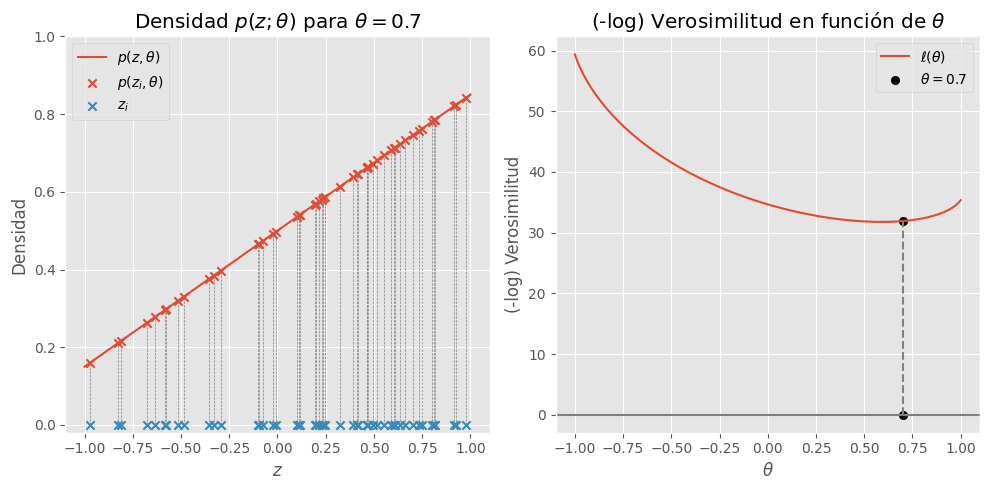

In [ ]:
# Otro grafico

theta = 0.7
theta_range = np.linspace(-1,1,1000)

NLL_range = []
for i in range(len(theta_range)):
  NLL_range.append(NLL(theta_range[i]))

z_range = np.linspace(-1,1,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(z_range,p(z_range,theta), label=r'$p(z,\theta)$')
axes[0].set_ylim(-0.02,1)

for i in range(N):
  axes[0].plot([T[i],T[i]],[0,p(T[i],theta)],linestyle='dashed',color='gray', linewidth=0.5)

axes[0].scatter(T, p(T,theta), marker='x', label=r'$p(z_i,\theta)$')
axes[0].scatter(T, [0]*N, marker='x', label=r'$z_i$')
axes[0].set_title(r'Densidad $p(z;\theta)$ para $\theta=$'+str(theta))
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel('Densidad')
axes[0].legend()

axes[1].plot(theta_range, NLL_range, label=r'$\ell(\theta)$')
axes[1].plot([theta,theta],[0,NLL(theta)],linestyle='dashed',color='gray')
axes[1].scatter([theta,theta],[0,NLL(theta)], color='black', label=r'$\theta=$'+str(theta))
axes[1].axhline(y=0,color='gray')
axes[1].set_title(r'(-log) Verosimilitud en función de $\theta$')
axes[1].set_xlabel(r'$\theta$')
axes[1].set_ylabel('(-log) Verosimilitud')
axes[1].legend()

plt.tight_layout()
plt.show()

# Proportional Search

In [ ]:
def proportional_search(f, a, b, tol=1e-5, rho=0.3):
  """
  Algoritmo de minimizacion Proportional Search.

  Parametros:
  - f: Funcion a minimizar.
  - a, b: Intervalo inicial [a, b].
  - tol: Tolerancia.
  - rho: Proporcion.

  Output:
  - x_opt: minimo estimado.
  - history_x: historia de x_opt.
  - history_f: historia de f(x_opt).
  """
  # Inicializamos x_opt arbitrariamente
  x_opt = (a + b) / 2

  # Inicializamos las historias
  history_x = []
  history_f = []

  # Contador de iteraciones
  Iter = 0

  # Escriba su código aquí

  return x_opt, history_x, history_f

In [ ]:
theta_hat_PS, history_theta_PS, history_NLL_PS = proportional_search(NLL, -1, 1, 0.01, 0.3)

-------------
Iteración: 0
-------------
a: -1.000, x: -0.400, y: 0.400, b: 1.000
Optimo: 0.000
-------------
Iteración: 1
-------------
a: -0.400, x: 0.020, y: 0.580, b: 1.000
Optimo: 0.400
-------------
Iteración: 2
-------------
a: 0.020, x: 0.314, y: 0.706, b: 1.000
Optimo: 0.580
-------------
Iteración: 3
-------------
a: 0.314, x: 0.520, y: 0.794, b: 1.000
Optimo: 0.706
-------------
Iteración: 4
-------------
a: 0.314, x: 0.458, y: 0.650, b: 0.794
Optimo: 0.520
-------------
Iteración: 5
-------------
a: 0.458, x: 0.559, y: 0.693, b: 0.794
Optimo: 0.650
-------------
Iteración: 6
-------------
a: 0.458, x: 0.529, y: 0.623, b: 0.693
Optimo: 0.559
-------------
Iteración: 7
-------------
a: 0.529, x: 0.578, y: 0.644, b: 0.693
Optimo: 0.623
-------------
Iteración: 8
-------------
a: 0.529, x: 0.563, y: 0.609, b: 0.644
Optimo: 0.578
-------------
Iteración: 9
-------------
a: 0.563, x: 0.587, y: 0.620, b: 0.644
Optimo: 0.609
-------------
Iteración: 10
-------------
a: 0.563, x: 0.

In [ ]:
print(f'El optimo estimado de theta es: {theta_hat_PS:.3f}')

El optimo estimado de theta es: 0.587


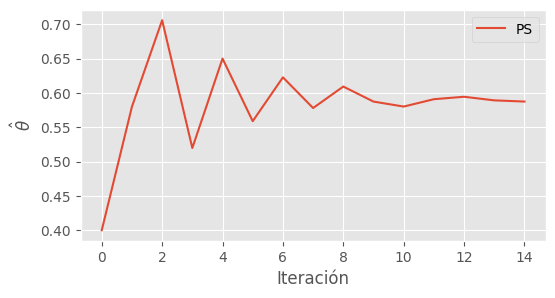

In [ ]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

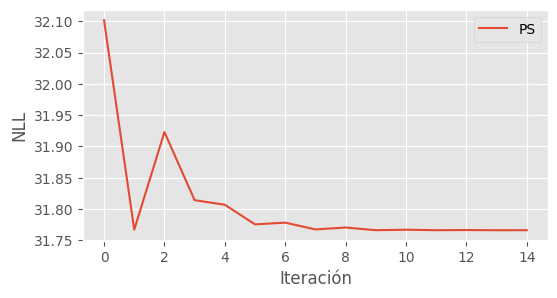

In [ ]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_PS, label=r'PS')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

# Descenso por gradiente

In [ ]:
def derivada_NLL(theta):
  return -np.sum(T/(1+theta*T))

In [ ]:
def gradient_descent(f, x0, lr=0.01, tol=1e-5, max_iter=1000):
  """
  Algoritmo de minimización Descenso por Gradiente.

  Parametros:
  - f: función a minimizar.
  - x0: estimación inicial.
  - lr: tasa de aprendizaje.
  - tol: tolerancia.
  - max_iter: número máximo de iteraciones.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = []
  history_f = []

  # Contador de iteraciones
  Iter = 0

  # Inicializamos x
  x = x0

  # Escriba su código aquí

  return x, history_x, history_f

In [ ]:
theta_hat_GD, history_theta_GD, history_NLL_GD = gradient_descent(NLL, 0, 0.001, 0.01, 1000)

-------------
Iteración: 0
-------------
x_min: 0.000
-------------
Iteración: 1
-------------
x_min: 0.009
-------------
Iteración: 2
-------------
x_min: 0.019
-------------
Iteración: 3
-------------
x_min: 0.028
-------------
Iteración: 4
-------------
x_min: 0.037
-------------
Iteración: 5
-------------
x_min: 0.045
-------------
Iteración: 6
-------------
x_min: 0.054
-------------
Iteración: 7
-------------
x_min: 0.062
-------------
Iteración: 8
-------------
x_min: 0.071
-------------
Iteración: 9
-------------
x_min: 0.079
-------------
Iteración: 10
-------------
x_min: 0.087
-------------
Iteración: 11
-------------
x_min: 0.095
-------------
Iteración: 12
-------------
x_min: 0.103
-------------
Iteración: 13
-------------
x_min: 0.111
-------------
Iteración: 14
-------------
x_min: 0.119
-------------
Iteración: 15
-------------
x_min: 0.126
-------------
Iteración: 16
-------------
x_min: 0.134
-------------
Iteración: 17
-------------
x_min: 0.141
-------------
Iterac

In [ ]:
print(f'El óptimo estimado de theta es: {theta_hat_GD:.3f}')

El óptimo estimado de theta es: 0.589


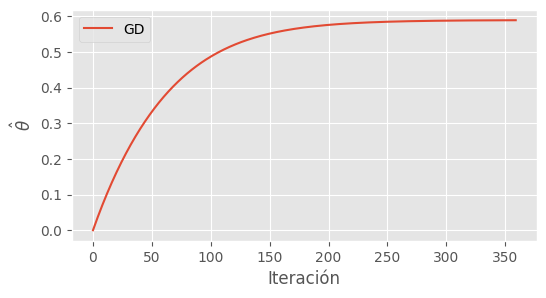

In [ ]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

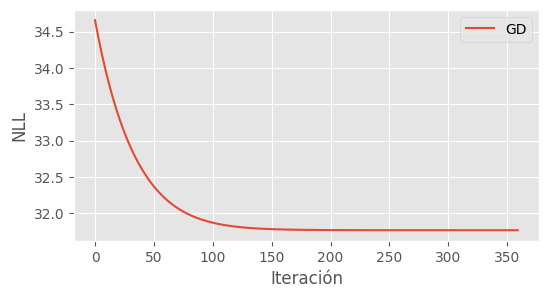

In [ ]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_GD, label=r'GD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()

# Descenso por Gradiente Estocástico

In [ ]:
def derivada_NLL_i(z, theta):
  return -np.sum(z/(1+theta*z))

In [ ]:
def stochastic_gradient_descent(f, x0, datos, lr=0.01, epochs=5):
  """
  Algoritmo Stochastic Gradient Descent (SGD).

  Parametros:
  - f: Función a minimizar.
  - x0: Estimación inicial
  - datos: datos disponibles.
  - lr: tasa de aprendizaje.
  - epochs: número de épocas.

  Output:
  - x_min: mínimo estimado.
  - history_x: historia de x_min.
  - history_f: historia de f(x_min).
  """
  # Inicializamos las historias
  history_x = []
  history_f = []

  # Inicializamos x
  x = x0

  # Contador de iteraciones
  Iter = 0

  # Escriba su código aquí

  return x, history_x, history_f

In [ ]:
theta_hat_SGD, history_theta_SGD, history_NLL_SGD = stochastic_gradient_descent(NLL, 0, T, 0.01, 20)

-------------
Iteración: 0
-------------
x_min: 0.000
-------------
Iteración: 0
-------------
x_min: -0.001
-------------
Iteración: 0
-------------
x_min: -0.007
-------------
Iteración: 0
-------------
x_min: -0.007
-------------
Iteración: 0
-------------
x_min: -0.001
-------------
Iteración: 0
-------------
x_min: 0.007
-------------
Iteración: 0
-------------
x_min: 0.016
-------------
Iteración: 0
-------------
x_min: 0.018
-------------
Iteración: 0
-------------
x_min: 0.013
-------------
Iteración: 0
-------------
x_min: 0.018
-------------
Iteración: 0
-------------
x_min: 0.020
-------------
Iteración: 0
-------------
x_min: 0.025
-------------
Iteración: 0
-------------
x_min: 0.022
-------------
Iteración: 0
-------------
x_min: 0.013
-------------
Iteración: 0
-------------
x_min: 0.021
-------------
Iteración: 0
-------------
x_min: 0.025
-------------
Iteración: 0
-------------
x_min: 0.034
-------------
Iteración: 0
-------------
x_min: 0.027
-------------
Iteración:

In [ ]:
print(f'El óptimo estimado de theta es: {theta_hat_SGD:.3f}')

El óptimo estimado de theta es: 0.565


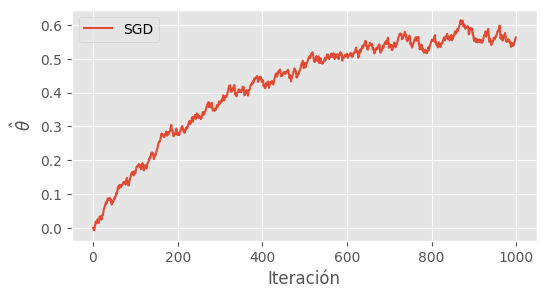

In [ ]:
# Graficamos la historia de theta_hat
plt.figure(figsize=(6,3))
plt.plot(history_theta_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel(r'$\hat{\theta}$')
plt.legend()
plt.show()

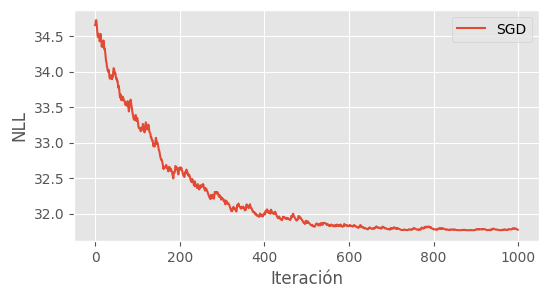

In [ ]:
# Graficamos la historia de NLL
plt.figure(figsize=(6,3))
plt.plot(history_NLL_SGD, label=r'SGD')
plt.xlabel('Iteración')
plt.ylabel('NLL')
plt.legend()
plt.show()